# Some First-Pass Plots
##### Zoheyr Doctor, 07/20/15
##### Using the following sim parameters:
SIMSED_GRIDONLY:   beta_max 

GENPEAK_beta_max:    0.3

GENRANGE_beta_max:   0.299    0.301

GENSIGMA_beta_max:   .01  .01

SIMSED_GRIDONLY:    m_solar

GENPEAK_m_solar:    0.1

GENRANGE_m_solar:   0.099  0.101

GENSIGMA_m_solar:   .001   .001

Import functions and settings:

In [1]:
import numpy as np
from glob import glob
import os
import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib.transforms as transforms

Grab the data from the text files and create necessary selectors.  Loop over the simulation files and the data files.  To qualify as a potential trigger observation (PTO), an observation must satisfy:
##### 1) 30.5 < zp < 34.0
#####2) -.5 < zp_fwhm_upper < 2.0
#####3) photprob > 0.5
#####4) photflag > 1 (ie. it's 4096)
To get a full-blown trigger, i and z PTOs must satisfy:
#####1) i and z PTO must be on the same night for shallow fields.  For deep fields allow the PTOs to be separated by max 1 night.
#####2) At least one of the two PTOs must have an SNR > 5 
As a first pass, we'll require that i and z band observations exist exactly 7 days after a trigger for a "detection"

In [2]:
lc = "b0.3_m0.1"
simpath = "../ZD_KNDES_" + lc + "/*DAT"
filetypes = ['sim','data']
paths = [simpath,"../DESY1_numepoch1_iz_real_text/*.dat"]
fieldtypes = ['shallow','deep']
dict1 = dict()
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        dict1[filetype+'_'+fieldtype] = trigColors.trigColors(paths[f],filetype,fieldtype)
        dict1[filetype+'_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1[filetype+'_'+fieldtype]['cnites'],dict1[filetype+'_'+fieldtype]['zbandinfo'],dict1[filetype+'_'+fieldtype]['ibandinfo'])

des_utils.py:293: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:
des_utils.py:315: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:


In [3]:
newpath = "plots_" + lc 
if not os.path.exists(newpath): os.makedirs(newpath)

Let's plot the colors of data versus the sims for the two fields and count the number of triggers and detections

sim shallow
number of objects:  6678
number of triggers:  5666
number of detections:  1924
sim deep
number of objects:  6678
number of triggers:  1039
number of detections:  287
data shallow
number of objects:  3637
number of triggers:  1720
number of detections:  923
data deep
number of objects:  3637
number of triggers:  544
number of detections:  0


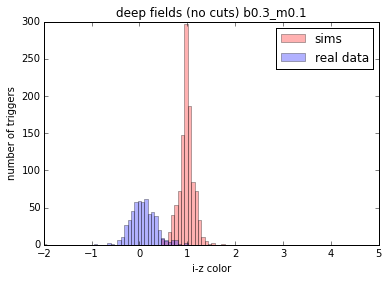

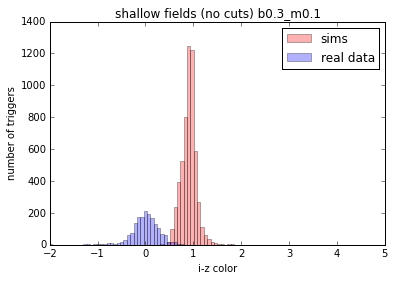

In [4]:
ax1 = plt.figure();
sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool')]
data_deep_colors = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool')]
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool')]
data_shallow_colors = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool')]
for h,hello in enumerate(dict1['sim_deep']['trigs'].astype('bool')):
    if hello:
        if dict1['sim_deep']['colors'][h] < -1:
            print dict1['sim_deep']['headers'][h]['SNID']
#print len(simsel),simsel
#print len(dict1['sim_deep']['trigs'].astype('bool'))
#print dict1['sim_deep']['headers'][dict1['sim_deep']['trigs'].astype('bool')]
plt.hist(sim_deep_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_deep_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields (no cuts) ' + lc);
plt.legend(['sims','real data']);
plt.savefig(newpath+'/no_cuts_colors_deep.png')
plt.figure();
plt.hist(sim_shallow_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_shallow_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields (no cuts) ' + lc);
plt.legend(['sims','real data']);
plt.savefig(newpath + '/no_cuts_colors_shallow.png')
txtfl = open(newpath+'/text_'+lc,'w')
txtfl.write('NO CUTS \n')
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        txtfl.write(filetype + ' '+ fieldtype +'\n')
        print 'number of objects: ', len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        txtfl.write('number of objects: ' + str(len(dict1[filetype+'_'+fieldtype]['zbandinfo']))+'\n')
        print 'number of triggers: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'])
        txtfl.write('number of triggers: '+ str(np.sum(dict1[filetype+'_'+fieldtype]['trigs']))+'\n')
        dets = np.sum(dict1[filetype+'_'+fieldtype]['trigs'] & dict1[filetype+'_'+fieldtype]['detections'])
        print 'number of detections: ', dets
        txtfl.write('number of detections: '+ str(dets)+'\n')

## Redshift Cut

In [5]:
plt.show()

Now we'll perform a first cut.  We want to remove objects associated with galaxies that are too far away.  Let's cut out everything with photoZ > 0.1

sim shallow
number of objects:  6678
number of triggers:  5666
number of detections:  1924
sim deep
number of objects:  6678
number of triggers:  1039
number of detections:  287
data shallow
number of objects:  3637
number of triggers:  748
number of detections:  401
data deep
number of objects:  3637
number of triggers:  234
number of detections:  0


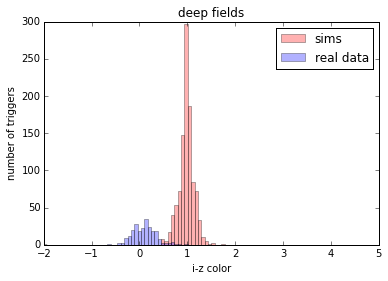

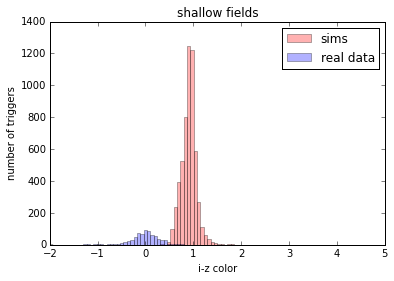

In [6]:
sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & # only objects that triggered
                                              (~dict1['sim_deep']['photoZcutsel'])] # only objects that have photoZ < .1
data_deep_colors = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel'])]
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                                    (~dict1['sim_shallow']['photoZcutsel'])]
data_shallow_colors = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool')& 
                                                      (~dict1['data_shallow']['photoZcutsel'])]
plt.figure();
plt.hist(sim_deep_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_deep_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.savefig(newpath+'/photoZcut_colors_deep.png')
plt.figure();
plt.hist(sim_shallow_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_shallow_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
plt.savefig(newpath+'/photoZcut_colors_shallow.png')
txtfl.write('PHOTO Z CUTS \n')
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        txtfl.write(filetype + ' '+ fieldtype +'\n')
        print 'number of objects: ', len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        txtfl.write('number of objects: ' + str(len(dict1[filetype+'_'+fieldtype]['zbandinfo']))+'\n')
        print 'number of triggers: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & ~dict1[filetype+'_'+fieldtype]['photoZcutsel'])
        txtfl.write('number of triggers: ' + str(np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & ~dict1[filetype+'_'+fieldtype]['photoZcutsel'])) + '\n')
        count = np.sum(dict1[filetype+'_'+fieldtype]['trigs'] & dict1[filetype+'_'+fieldtype]['detections'] & ~dict1[filetype+'_'+fieldtype]['photoZcutsel'])
        print 'number of detections: ', count
        txtfl.write('number of detections: ' + str(count) + '\n')

## Long-Timescale Cut

Let's look at the maximum time separation between triggers for each object.  Since KN have shorter timescales than SN, we should be able to cut things that have triggers that are sufficiently spaced in time.  First we get the list of maximum nites between triggers:

In [7]:
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        nitediff = np.zeros(len(dict1[filetype+'_'+fieldtype]['cnites']))
        #multitrig = np.zeros(len(dict1[filetype+'_'+fieldtype]['cnites']),dtype = 'bool')
        for i in range(0,len(dict1[filetype+'_'+fieldtype]['cnites'])):
            if dict1[filetype+'_'+fieldtype]['cnites'][i].size == 0:
                nitediff[i] = -1
            else:
                nitediff[i] = dict1[filetype+'_'+fieldtype]['cnites'][i].max() - dict1[filetype+'_'+fieldtype]['cnites'][i].min()
            #multitrig[i] = nitediff[i] <= 10 
        dict1[filetype+'_'+fieldtype]['nitediff'] = nitediff
        #dict1[filetype+'_'+fieldtype]['multitrig'] = multitrig

Now let's plot histograms of the timescales

maximum separation between triggers for all simulated shallow-field objects:  18.0
maximum separation between triggers for all simulated deep-field objects:  16.0


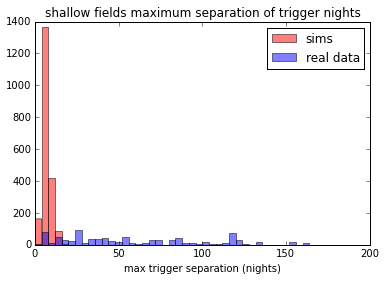

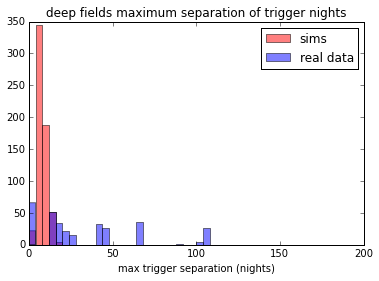

In [8]:
plt.figure();
plt.hist(dict1['sim_shallow']['nitediff'][dict1['sim_shallow']['nitediff'] >0],color='r',alpha = 0.5,bins=50,range = (0,200));
plt.hist(dict1['data_shallow']['nitediff'][dict1['data_shallow']['nitediff'] >0],color='b',alpha = 0.5,bins=50,range = (0,200));
plt.xlabel('max trigger separation (nights)')
plt.title('shallow fields maximum separation of trigger nights')
plt.legend(['sims','real data']);
plt.savefig(newpath+'/trig_sep_shallow.png')
plt.figure();
plt.hist(dict1['sim_deep']['nitediff'][dict1['sim_deep']['nitediff'] >0],color='r',alpha = 0.5,bins=50,range = (0,200));
plt.hist(dict1['data_deep']['nitediff'][dict1['data_deep']['nitediff'] >0],color='b',alpha = 0.5,bins=50,range = (0,200));
plt.title('deep fields maximum separation of trigger nights')
plt.xlabel('max trigger separation (nights)')
plt.legend(['sims','real data']);
plt.savefig(newpath+'/trig_sep_deep.png')
maxsimtrigsep_shallow = np.max(dict1['sim_shallow']['nitediff'][dict1['sim_shallow']['nitediff'] >0])
maxsimtrigsep_deep = np.max(dict1['sim_deep']['nitediff'][dict1['sim_deep']['nitediff'] >0])
print 'maximum separation between triggers for all simulated shallow-field objects: ',maxsimtrigsep_shallow
txtfl.write('maximum separation between triggers for all simulated shallow-field objects: ' + str(maxsimtrigsep_shallow) + '\n')
print 'maximum separation between triggers for all simulated deep-field objects: ',maxsimtrigsep_deep
txtfl.write('maximum separation between triggers for all simulated deep-field objects: ' + str(maxsimtrigsep_deep) + '\n')

Of the KN that were simulated, the maximum time seen between triggers for a KN is 16 days.  So let's cut everything that has triggers spaced by over 20 days.

In [9]:
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        multitrig = np.zeros(len(dict1[filetype+'_'+fieldtype]['cnites']),dtype = 'bool')
        for i in range(0,len(dict1[filetype+'_'+fieldtype]['cnites'])):
            multitrig[i] = dict1[filetype+'_'+fieldtype]['nitediff'][i] <= 20
        dict1[filetype+'_'+fieldtype]['multitrig'] = multitrig

Now let's plot our colors with the cut (normalized):

sim shallow
number of objects:  6678
number of triggers:  5666
number of detections:  1924
sim deep
number of objects:  6678
number of triggers:  1039
number of detections:  287
data shallow
number of objects:  3637
number of triggers:  411
number of detections:  122
data deep
number of objects:  3637
number of triggers:  146
number of detections:  0


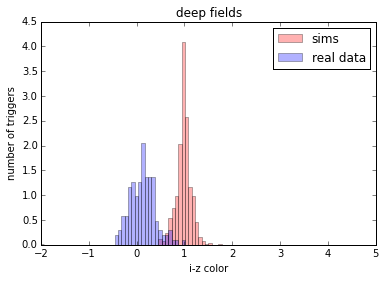

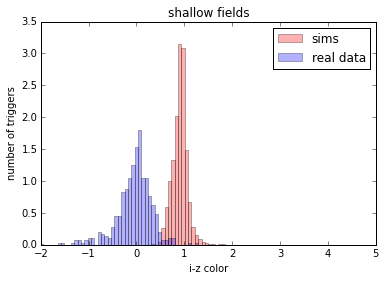

In [10]:
plt.figure();
sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & 
                                              (~dict1['sim_deep']['photoZcutsel']) & 
                                              dict1['sim_deep']['multitrig']]
data_deep_colors = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                dict1['data_deep']['multitrig']]
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                               (~dict1['sim_shallow']['photoZcutsel']) & 
                                               dict1['sim_shallow']['multitrig']]
data_shallow_colors = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool') & 
                                                     (~dict1['data_shallow']['photoZcutsel']) & 
                                                     dict1['data_shallow']['multitrig']]
plt.hist(sim_deep_colors,bins=100,alpha=0.3,color='r',range=(-2,5),normed=True);
plt.hist(data_deep_colors,bins=100,alpha=0.3,color='b',range=(-2,5),normed=True);
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.savefig(newpath+'/multitrig_cut_deep.png')
plt.figure();
plt.hist(sim_shallow_colors,bins=100,alpha=0.3,color='r',range=(-2,5),normed=True);
plt.hist(data_shallow_colors,bins=100,alpha=0.3,color='b',range=(-2,5),normed=True);
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
plt.savefig(newpath+'/multitrig_cut_shallow.png')
txtfl.write('>20 DAY TRIG CUT \n')
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        txtfl.write(filetype + ' '+ fieldtype +'\n')
        numobj = len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        print 'number of objects: ', numobj
        txtfl.write('number of objects: '+str(numobj)+'\n')
        numtrig = np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'])
        print 'number of triggers: ', numtrig
        txtfl.write('number of triggers: '+str(numtrig)+'\n')
        numdet = np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'] &
                                              dict1[filetype+'_'+fieldtype]['detections'])
        print 'number of detections: ', numdet 
        txtfl.write('number of detections: '+str(numdet)+'\n')

## Follow-Up Cut

We usually will require a follow-up observation to a trigger in order for us to use that trigger to identify KN.  So, let's just plot the colors of objects that had the trigger and follow-up observation.  The cuts we used above will still be in effect, so none of the numbers should change from above

sim shallow
number of objects:  6678
number of triggers:  5666
number of detections:  1924
sim deep
number of objects:  6678
number of triggers:  1039
number of detections:  287
data shallow
number of objects:  3637
number of triggers:  411
number of detections:  122
data deep
number of objects:  3637
number of triggers:  146
number of detections:  0


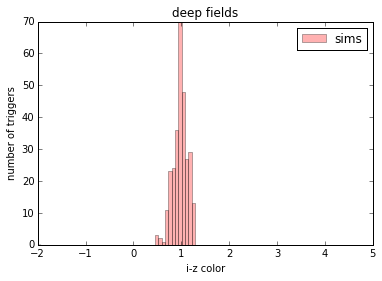

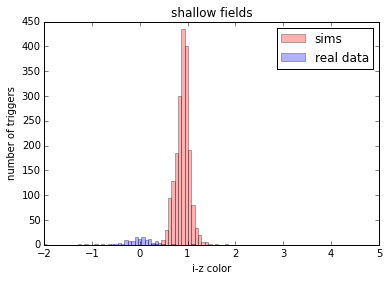

In [11]:
plt.figure();
sim_deep_detect = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & 
                            (~dict1['sim_deep']['photoZcutsel']) & 
                            dict1['sim_deep']['multitrig'] & 
                            dict1['sim_deep']['detections'].astype('bool') ]
data_deep_detect = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                dict1['data_deep']['multitrig'] & 
                                                dict1['data_deep']['detections'].astype('bool')]
try:
    plt.hist(sim_deep_detect,bins=100,alpha=0.3,color='r',range=(-2,5));
except ValueError:
    pass
try:
    plt.hist(data_deep_detect,bins=100,alpha=0.3,color='b',range=(-2,5));
except ValueError:
    pass
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.savefig(newpath+'/followup_cut_deep.png')
plt.figure();
sim_shallow_detect = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                                    (~dict1['sim_shallow']['photoZcutsel']) & 
                                                    dict1['sim_shallow']['multitrig'] & 
                                                    dict1['sim_shallow']['detections'].astype('bool')]
data_shallow_detect = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool') & 
                                (~dict1['data_shallow']['photoZcutsel']) & 
                                dict1['data_shallow']['multitrig'] & 
                                dict1['data_shallow']['detections'].astype('bool')]
try:
    plt.hist(sim_shallow_detect,bins=100,alpha=0.3,color='r',range=(-2,5));
except ValueError:
    pass
try:
    plt.hist(data_shallow_detect,bins=100,alpha=0.3,color='b',range=(-2,5));
except ValueError:
    pass
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
plt.savefig(newpath+'/followup_cut_shallow.png')
txtfl.write('FOLLOW UP CUT \n')
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        txtfl.write(filetype + ' ' + fieldtype + '\n')
        numobj = len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        print 'number of objects: ',numobj
        txtfl.write('number of objects: ' + str(numobj) + '\n')
        numtrig = np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'])
        print 'number of triggers: ', numtrig
        txtfl.write('number of triggers: ' + str(numtrig) + '\n')
        numdet = np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'] &
                                              dict1[filetype+'_'+fieldtype]['detections'])
        print 'number of detections: ',numdet
        txtfl.write('number of detections: ' + str(numdet) + '\n')

## Refined Follow-Up Cut

The "detections" we have been quoting above all required a follow-up observation exactly 7 days after a trigger observation.  This is too strong a restriction.  We really need a follow-up only between 3 and 10 days after a trigger.  Specifically, we need at least one i observation within 3-10 days after the trigger and at least one z observation within 3-10 days after the trigger. First we set our detection booleans according to this looser constraint:

In [12]:
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        dict1[filetype+'_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1[filetype+'_'+fieldtype]['cnites'],
                                                                                         dict1[filetype+'_'+fieldtype]['zbandinfo'],
                                                                                         dict1[filetype+'_'+fieldtype]['ibandinfo'],
                                                                                        3,10,1)

Now we'll plot the trigger color histograms of detected objects just like above.  Note that the photoZ cut is still in effect:

sim shallow
number of objects:  6678
number of triggers:  5666
number of detections:  4907
sim deep
number of objects:  6678
number of triggers:  1039
number of detections:  974
data shallow
number of objects:  3637
number of triggers:  411
number of detections:  365
data deep
number of objects:  3637
number of triggers:  146
number of detections:  133


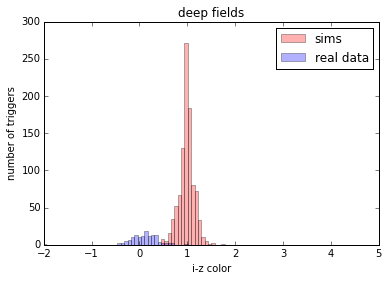

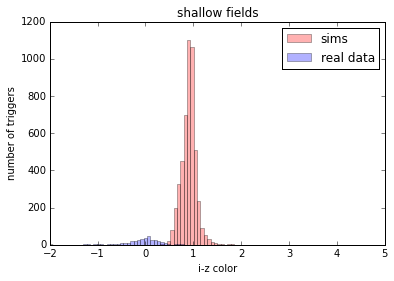

In [13]:
plt.figure();
sim_deep_detect = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & 
                            (~dict1['sim_deep']['photoZcutsel']) & 
                            dict1['sim_deep']['multitrig'] & 
                            dict1['sim_deep']['detections'].astype('bool') ]
data_deep_detect = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                dict1['data_deep']['multitrig'] & 
                                                dict1['data_deep']['detections'].astype('bool')]
try:
    plt.hist(sim_deep_detect,bins=100,alpha=0.3,color='r',range=(-2,5));
except ValueError:
    pass
try:
    plt.hist(data_deep_detect,bins=100,alpha=0.3,color='b',range=(-2,5));
except ValueError:
    pass
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.savefig(newpath+'/refined_followup_cut_deep.png')
plt.figure();
sim_shallow_detect = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                                    (~dict1['sim_shallow']['photoZcutsel']) & 
                                                    dict1['sim_shallow']['multitrig'] & 
                                                    dict1['sim_shallow']['detections'].astype('bool')]
data_shallow_detect = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool') & 
                                (~dict1['data_shallow']['photoZcutsel']) & 
                                dict1['data_shallow']['multitrig'] & 
                                dict1['data_shallow']['detections'].astype('bool')]
try:
    plt.hist(sim_shallow_detect,bins=100,alpha=0.3,color='r',range=(-2,5));
except ValueError:
    pass
try:
    plt.hist(data_shallow_detect,bins=100,alpha=0.3,color='b',range=(-2,5));
except ValueError:
    pass
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
plt.savefig(newpath+'/refined_followup_cut_shallow.png')
txtfl.write('REFINED FOLLOW UP CUT \n')
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        txtfl.write(filetype + ' ' + fieldtype + '\n')
        numobj = len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        numtrig = np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'])
        numdet = np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'] &
                                              dict1[filetype+'_'+fieldtype]['detections'])
        print 'number of objects: ', numobj 
        print 'number of triggers: ', numtrig
        print 'number of detections: ', numdet
        txtfl.write('number of objects: ' + str(numobj) + '\n')
        txtfl.write('number of triggers: ' + str(numtrig) + '\n')
        txtfl.write('number of detections: ' + str(numdet) + '\n')

## Color-timescale scatter plots

If an object has multiple triggers, we want to plot the i-z color of the first trigger versus the maximum time separation between triggers.

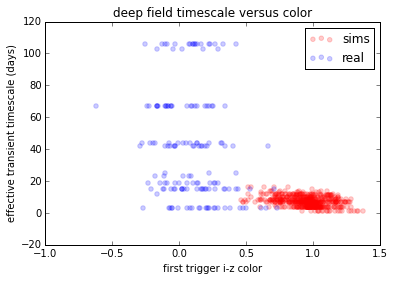

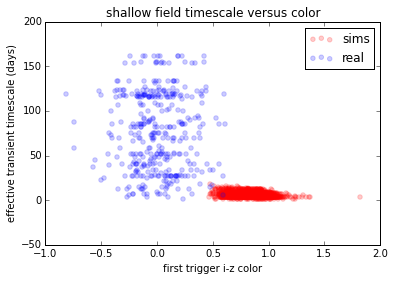

In [14]:
plt.figure();
sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & 
                                              (~dict1['sim_deep']['photoZcutsel']) & 
                                              (dict1['sim_deep']['nitediff']>0)]
data_deep_colors = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                (dict1['data_deep']['nitediff']>0)]
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                               (~dict1['sim_shallow']['photoZcutsel']) & 
                                               (dict1['sim_shallow']['nitediff']>0)]
data_shallow_colors = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool') & 
                                                     (~dict1['data_shallow']['photoZcutsel']) & 
                                                    (dict1['data_shallow']['nitediff']>0)]
sim_deep_times = dict1['sim_deep']['nitediff'][dict1['sim_deep']['trigs'].astype('bool') & 
                                              (~dict1['sim_deep']['photoZcutsel']) & 
                                              (dict1['sim_deep']['nitediff']>0)]
data_deep_times = dict1['data_deep']['nitediff'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                (dict1['data_deep']['nitediff']>0)]
sim_shallow_times = dict1['sim_shallow']['nitediff'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                               (~dict1['sim_shallow']['photoZcutsel']) & 
                                               (dict1['sim_shallow']['nitediff']>0)]
data_shallow_times = dict1['data_shallow']['nitediff'][dict1['data_shallow']['trigs'].astype('bool') & 
                                                     (~dict1['data_shallow']['photoZcutsel']) & 
                                                     (dict1['data_shallow']['nitediff']>0)]

alpha=0.2
plt.scatter(sim_deep_colors,sim_deep_times,color='r', alpha=alpha);
plt.scatter(data_deep_colors,data_deep_times,color='b', alpha=alpha);
plt.title('deep field timescale versus color')
plt.xlabel('first trigger i-z color')
plt.ylabel('effective transient timescale (days)')
plt.legend(['sims','real'])
plt.figure();
plt.scatter(sim_shallow_colors,sim_shallow_times,color='r', alpha=alpha);
plt.scatter(data_shallow_colors,data_shallow_times,color='b', alpha=alpha);
plt.title('shallow field timescale versus color')
plt.xlabel('first trigger i-z color')
plt.ylabel('effective transient timescale (days)')
plt.legend(['sims','real'])

Now to refine this further.  In the above plots, we've only looked at things that trigger multiple times.  Let's look at things that trigger multiple times and have detections.  We'll start by finding the upper bound on the transient timescale.  A naive way to do this is look for the time between the first trigger and the first follow-up observation to the last trigger.  So if an object triggers on day 0 and then on day 10 and then has a follow up observation on day 12, then the upper bound on the transient timescale is 12 days.  Let's plot these upper bounds along with the object's first-trigger color.

In [15]:
reload(des_utils)
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        zdetflux,zdetMJD,zdetflags = des_utils.get_detection_info(dict1[filetype+'_'+fieldtype]['cnites'],
                                                dict1[filetype+'_'+fieldtype]['zbandinfo'],
                                                3,10,1)
        idetflux,idetMJD,idetflags = des_utils.get_detection_info(dict1[filetype+'_'+fieldtype]['cnites'],
                                                dict1[filetype+'_'+fieldtype]['ibandinfo'],
                                                3,10,1)
        dict1[filetype+'_'+fieldtype]['zdetflux'] = zdetflux
        dict1[filetype+'_'+fieldtype]['zdetMJD'] = zdetMJD
        dict1[filetype+'_'+fieldtype]['zdetflags'] = zdetflags
        dict1[filetype+'_'+fieldtype]['idetflux'] = idetflux
        dict1[filetype+'_'+fieldtype]['idetMJD'] = idetMJD
        dict1[filetype+'_'+fieldtype]['idetflags'] = idetflags
        dict1[filetype+'_'+fieldtype]['detections'] = idetflags & zdetflags

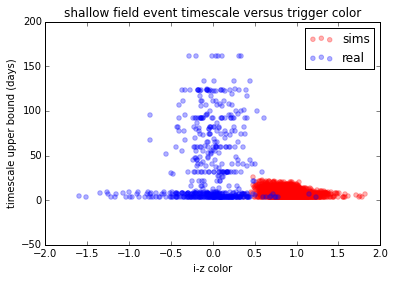

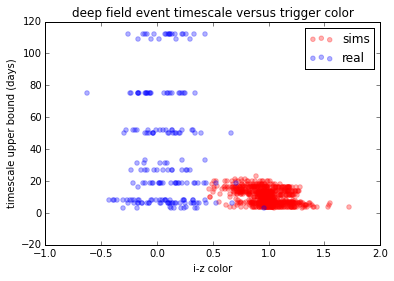

In [16]:
cols = ['r','b']
titles = ['shallow field event timescale versus trigger color', 'deep field event timescale versus trigger color']
for n,fieldtype in enumerate(fieldtypes):
    plt.figure();
    for f,filetype in enumerate(filetypes):  
        color = dict1[filetype+'_'+fieldtype]['colors'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        itime = dict1[filetype+'_'+fieldtype]['idetMJD'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                         (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        ztime = dict1[filetype+'_'+fieldtype]['zdetMJD'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                         (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        trigtimes = dict1[filetype+'_'+fieldtype]['cnites'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                            (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        trignite = np.empty(len(trigtimes))
        for i in range(0,len(trignite)):
            trignite[i] = trigtimes[i][0]
        time = ztime - trignite
        plt.scatter(color,time,color=cols[f],alpha=0.3)
    plt.legend(['sims','real']);
    plt.title(titles[n])
    plt.xlabel('i-z color')
    plt.ylabel('timescale upper bound (days)')
                                                              

We can go one step further and show the lower and upper bounds for the timescale.  The lower bound is zero for objects that just triggered once and then had a follow-up observation.  For objects that triggered multiple times, the lower bound is the time between the first and last triggers.

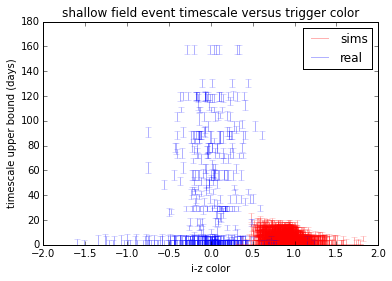

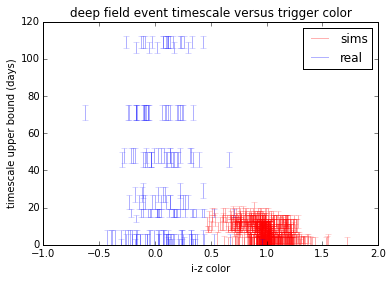

In [17]:
cols = ['r','b']
titles = ['shallow field event timescale versus trigger color', 'deep field event timescale versus trigger color']
for n,fieldtype in enumerate(fieldtypes):
    plt.figure();
    for f,filetype in enumerate(filetypes):  
        color = dict1[filetype+'_'+fieldtype]['colors'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        itime = dict1[filetype+'_'+fieldtype]['idetMJD'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                         (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        ztime = dict1[filetype+'_'+fieldtype]['zdetMJD'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                         (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        trigtimes = dict1[filetype+'_'+fieldtype]['cnites'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                            (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        trignite = np.empty(len(trigtimes))
        trig2 = np.empty(len(trigtimes))
        for i in range(0,len(trignite)):
            trignite[i] = trigtimes[i][0]
            trig2[i] = trigtimes[i][-1]
        mintime = trig2 - trignite
        maxtime = ztime - trignite
        times = [-mintime,maxtime]
        plt.errorbar(color,np.zeros(len(color)),times,color=cols[f],alpha=0.3)
    plt.legend(['sims','real']);
    plt.title(titles[n])
    plt.xlabel('i-z color')
    plt.ylabel('timescale upper bound (days)')
    plt.savefig(newpath + '/timescale_'+fieldtype+'.png')
       

# Trigger vs. Follow-Up Color

We want to plot the color of the trigger versus the color of the follow-up.  The follow-up fluxes can be negative, which will not allow us to get color magnitudes, so we want to pass over everything with a negative flux follow-up.

4595 4595
352 352
843 843
107 107


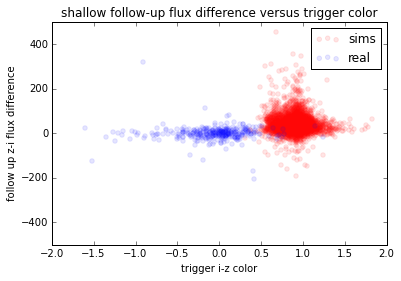

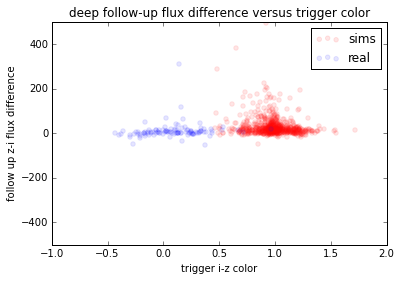

In [18]:
cols = ['r','b']
titles = ['shallow follow-up flux difference versus trigger color', 'deep follow-up flux difference versus trigger color']
for n,fieldtype in enumerate(fieldtypes):
    plt.figure();
    for f,filetype in enumerate(filetypes):
        trigcolors = dict1[filetype+'_'+fieldtype]['colors'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections'] &
                                                            dict1[filetype+'_'+fieldtype]['multitrig']]
        idetflux1 = dict1[filetype+'_'+fieldtype]['idetflux'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections'] &
                                                            dict1[filetype+'_'+fieldtype]['multitrig']]
        zdetflux1 = dict1[filetype+'_'+fieldtype]['zdetflux'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections'] &
                                                            dict1[filetype+'_'+fieldtype]['multitrig']]
        print len(idetflux1), len(zdetflux1)
        #trigcolors = trigcolors[(idetflux1 > 0) & (zdetflux1 > 0)]
        #idetflux2 = idetflux1[(idetflux1 > 0) & (zdetflux1 > 0)]
        #zdetflux2 = zdetflux1[(idetflux1 > 0) & (zdetflux1 > 0)]
        #followupcolor = -2.5*np.log(idetflux2) + 2.5*np.log(zdetflux2)
        followupfluxdiff = (zdetflux1 - idetflux1)
        plt.scatter(trigcolors,followupfluxdiff,color=cols[f],alpha=0.1)
    plt.title(titles[n])
    plt.legend(['sims','real']);
    plt.xlabel('trigger i-z color')
    plt.ylabel('follow up z-i flux difference')
    plt.ylim(ymin=-500,ymax=500)
    plt.savefig(newpath + '/trigger_color_followup_fluxdiff_'+fieldtype+'.png')

#Trigger Color vs. Follow-Up r and g Flux

107 107
107 107
107 107
107 107


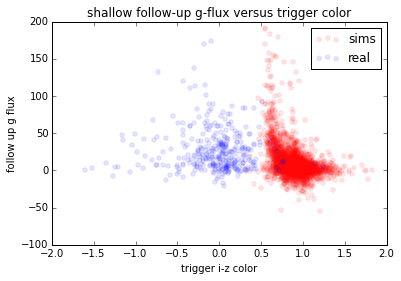

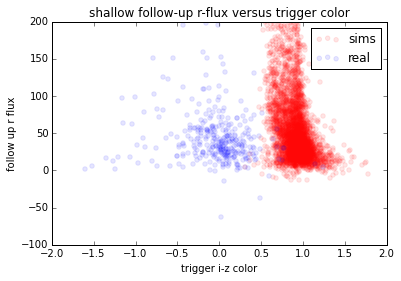

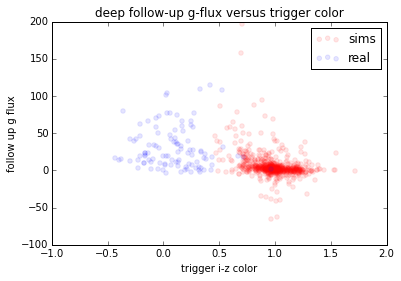

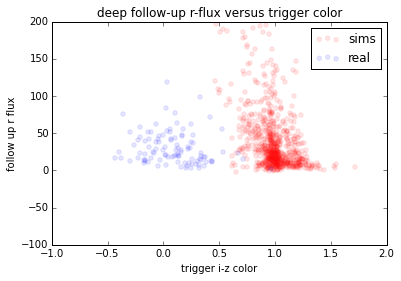

In [19]:
cols = ['r','b']
titles = ['shallow follow-up g-flux versus trigger color', 'deep follow-up g-flux versus trigger color',
         'shallow follow-up r-flux versus trigger color', 'deep follow-up r-flux versus trigger color']
for n,fieldtype in enumerate(fieldtypes):
    figg = plt.figure()
    figr = plt.figure()
    axg = figg.add_subplot(111)
    axr = figr.add_subplot(111)
    for f,filetype in enumerate(filetypes):
        trignites = dict1[filetype+'_'+fieldtype]['cnites'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections'] &
                                                            dict1[filetype+'_'+fieldtype]['multitrig']]
        trigcolors = dict1[filetype+'_'+fieldtype]['colors'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections'] &
                                                            dict1[filetype+'_'+fieldtype]['multitrig']]
        rbandinfo = dict1[filetype+'_'+fieldtype]['rbandinfo'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections'] &
                                                            dict1[filetype+'_'+fieldtype]['multitrig']]
        gbandinfo = dict1[filetype+'_'+fieldtype]['gbandinfo'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections'] &
                                                            dict1[filetype+'_'+fieldtype]['multitrig']]
        rflux = np.empty(len(rbandinfo))
        gflux = np.empty(len(gbandinfo))
        rflux[:] = np.NAN
        gflux[:] = np.NAN
        rnxtnt = np.empty(len(rbandinfo),dtype=object)
        gnxtnt = np.empty(len(gbandinfo),dtype=object)
        for i in range(0,len(rbandinfo)):
            rnxtnt[i] = rbandinfo[i][1]>=trignites[i][0] 
            gnxtnt[i] = gbandinfo[i][1]>=trignites[i][0] 
            try:
                rflux[i] = rbandinfo[i][2][rnxtnt[i]][0]
                gflux[i] = gbandinfo[i][2][gnxtnt[i]][0]
            except IndexError:
                pass 
        print len(idetflux1), len(zdetflux1)
        
        axg.scatter(trigcolors,gflux,color=cols[f],alpha=0.1)
        axr.scatter(trigcolors,rflux,color=cols[f],alpha=0.1)
    axg.set_title(titles[n])
    axr.set_title(titles[n+2])
    axg.legend(['sims','real']);
    axr.legend(['sims','real']);
    axg.set_xlabel('trigger i-z color')
    axr.set_xlabel('trigger i-z color')
    axg.set_ylabel('follow up g flux')
    axr.set_ylabel('follow up r flux')
    axg.set_ylim(ymin=-100,ymax=200)
    axr.set_ylim(ymin=-100,ymax=200)
    figg.savefig(newpath + '/trigger_color_followup_g_'+fieldtype+'.png')
    figr.savefig(newpath + '/trigger_color_followup_r_'+fieldtype+'.png')
    
txtfl.close()

## Now in 3D!

In [20]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib osx

In [21]:
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121, projection='3d')
ax2 = plt.subplot(122, projection='3d')

sim_deep_sel = dict1['sim_deep']['trigs'] & (~dict1['sim_deep']['photoZcutsel']) & dict1['sim_deep']['detections'] & dict1['sim_deep']['multitrig']
data_deep_sel = dict1['data_deep']['trigs'] & (~dict1['data_deep']['photoZcutsel']) & dict1['data_deep']['detections'] & dict1['data_deep']['multitrig']
sim_shallow_sel = dict1['sim_shallow']['trigs'] & (~dict1['sim_shallow']['photoZcutsel']) & dict1['sim_shallow']['detections'] & dict1['sim_shallow']['multitrig']
data_shallow_sel = dict1['data_shallow']['trigs'] & (~dict1['data_shallow']['photoZcutsel']) & dict1['data_shallow']['detections'] & dict1['data_shallow']['multitrig']


sim_deep_colors = dict1['sim_deep']['colors'][sim_deep_sel]

data_deep_colors = dict1['data_deep']['colors'][data_deep_sel]

sim_shallow_colors = dict1['sim_shallow']['colors'][sim_shallow_sel]

data_shallow_colors = dict1['data_shallow']['colors'][data_shallow_sel]

sim_deep_times = dict1['sim_deep']['nitediff'][sim_deep_sel]

data_deep_times = dict1['data_deep']['nitediff'][data_deep_sel]

sim_shallow_times = dict1['sim_shallow']['nitediff'][sim_shallow_sel]

data_shallow_times = dict1['data_shallow']['nitediff'][data_shallow_sel]

sim_deep_idetflux = dict1['sim_deep']['idetflux'][sim_deep_sel]

data_deep_idetflux = dict1['data_deep']['idetflux'][data_deep_sel]

sim_shallow_idetflux = dict1['sim_shallow']['idetflux'][sim_shallow_sel]

data_shallow_idetflux = dict1['data_shallow']['idetflux'][data_shallow_sel]

sim_deep_zdetflux = dict1['sim_deep']['zdetflux'][sim_deep_sel]

data_deep_zdetflux = dict1['data_deep']['zdetflux'][data_deep_sel]

sim_shallow_zdetflux = dict1['sim_shallow']['zdetflux'][sim_shallow_sel]

data_shallow_zdetflux = dict1['data_shallow']['zdetflux'][data_shallow_sel]

# sim_deep_idetflux2 = sim_deep_idetflux1[(sim_deep_idetflux1 > 0) & (sim_deep_zdetflux1 > 0)]
# data_deep_idetflux2 = data_deep_idetflux1[(data_deep_idetflux1 > 0) & (data_deep_zdetflux1 > 0)]
# sim_shallow_idetflux2 = sim_shallow_idetflux1[(sim_shallow_idetflux1 > 0) & (sim_shallow_zdetflux1 > 0)]
# data_shallow_idetflux2 = data_shallow_idetflux1[(data_shallow_idetflux1 > 0) & (data_shallow_zdetflux1 > 0)]

# sim_deep_zdetflux2 = sim_deep_zdetflux1[(sim_deep_idetflux1 > 0) & (sim_deep_zdetflux1 > 0)]
# data_deep_zdetflux2 = data_deep_zdetflux1[(data_deep_idetflux1 > 0) & (data_deep_zdetflux1 > 0)]
# sim_shallow_zdetflux2 = sim_shallow_zdetflux1[(sim_shallow_idetflux1 > 0) & (sim_shallow_zdetflux1 > 0)]
# data_shallow_zdetflux2 = data_shallow_zdetflux1[(data_shallow_idetflux1 > 0) & (data_shallow_zdetflux1 > 0)]

sim_deep_followupcolor = -2.5*np.log(sim_deep_idetflux) + 2.5*np.log(sim_deep_zdetflux)
data_deep_followupcolor = -2.5*np.log(data_deep_idetflux) + 2.5*np.log(data_deep_zdetflux)
sim_shallow_followupcolor = -2.5*np.log(sim_shallow_idetflux) + 2.5*np.log(sim_shallow_zdetflux)
data_shallow_followupcolor = -2.5*np.log(data_shallow_idetflux) + 2.5*np.log(data_shallow_zdetflux)

alpha=0.3
ax1.scatter(sim_deep_colors, sim_deep_times, sim_deep_followupcolor, color='r', alpha=alpha);
ax1.scatter(data_deep_colors, data_deep_times, data_deep_followupcolor, color='b', alpha=alpha);
ax2.scatter(sim_shallow_colors, sim_shallow_times, sim_shallow_followupcolor, color='r', alpha=alpha);
ax2.scatter(data_shallow_colors, data_shallow_times, data_shallow_followupcolor, color='b', alpha=alpha);

ax1.set_title('deep field')
ax1.set_xlabel('first trigger i-z color')
ax1.set_ylabel('effective transient timescale (days)')
ax1.set_zlabel('follow-up i-z color')
ax1.legend(['sims','real'])

ax2.set_title('shallow field')
ax2.set_xlabel('first trigger i-z color')
ax2.set_ylabel('effective transient timescale (days)')
ax2.set_zlabel('follow-up i-z color')
ax2.legend(['sims','real'])


/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:53: RuntimeWarning: invalid value encountered in log
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: RuntimeWarning: invalid value encountered in log
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:55: RuntimeWarning: invalid value encountered in log
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:56: RuntimeWarning: invalid value encountered in log


In [22]:
plt.show()

In [23]:
event_id = np.arange(len(data_deep_colors))[data_deep_colors > 2.][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
print event_id

In [ ]:
header = [el for i, el in enumerate(dict1['data_deep']['headers']) if data_deep_sel[i]][event_id]
trignites = dict1['data_deep']['cnites'][event_id]
print header['PRIVATE(DES_snid)']
print trignites
trignite = trignites[0]
print(header['RA'], header['DECL'])

In [ ]:
this_event = event_id

cut = 100.

mjd = dict1['data_deep']['zbandinfo'][this_event][1]
ztimes = mjd
zsel = ztimes < trignite + cut
ztimes = ztimes[zsel]
zflux = dict1['data_deep']['zbandinfo'][this_event][2][zsel]

mjd = dict1['data_deep']['ibandinfo'][this_event][1]
itimes = mjd
isel = itimes < trignite + cut
itimes = itimes[isel]
iflux = dict1['data_deep']['ibandinfo'][this_event][2][isel]

plt.plot(ztimes, zflux, label='Z')
plt.plot(itimes, iflux, label='I')
plt.axvline(trignite)
plt.axvline(trignite-1)
plt.legend()
plt.gca().set_yscale('log')


In [ ]:
-2.5*(np.log10(21)-np.log10(7))